### A8 - Using Deep Features for Image Retrieval

### Part 2 of 2.

### Due: Wednesday, May 30th on Canvas at 11:59 pm


Copyright ©2018 Emily Fox. All rights reserved. Permission is hereby granted to students registered for University of Washington CSE/STAT 416 for use solely during Spring Quarter 2018 for purposes of the course. No other use, copying, distribution, or modification is permitted without prior written consent. Copyrights for third-party components of this work must be honored. Instructors interested in reusing these course materials should contact the author.

In [1]:
import turicreate as tc
import matplotlib.pyplot as plt
%matplotlib inline

### Load the CIFAR-10 dataset

We will use a popular benchmark dataset in computer vision called CIFAR-10.  

(We've reduced the data to just 4 categories = {'cat','bird','automobile','dog'}.)

This dataset is already split into a training set and test set. In this simple retrieval example, there is no notion of "testing", so we will only use the training data.

In [2]:
image_train = tc.SFrame('/data/image_train_data/')
image_test = tc.SFrame('/data/image_test_data/')

### Computing deep features for our images

The two lines below allow us to compute deep features. This computation takes a little while, so we have already computed them and saved the results as a column in the data you loaded. 

```python
image_train['deep_features'] = deep_learning_model.extract_features(image_train)
```

(Note that if you would like to compute such deep features and have a GPU on your machine, you should use the GPU enabled Turi Create, which will be significantly faster for this task.)

In [3]:
image_train.head()

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.242871761322,1.09545373917, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.525087952614, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.566015958786, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.12979578972, 0.0, 0.0,0.778194487095, 0.0, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.71786928177, 0.0, 0.0,0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.57818555832, 0.0, 0.0,0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.220677852631, 0.0, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0, 0.23753464222, 0.0,0.0, 0.0, 0.0, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.5737862587, 0.0, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.658935725689, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


**Question 2.1:** What is the least common category in the training data?

**Hint: ** Use group by.

In [9]:
label_counts = image_train.groupby(key_column_names='label',
                                   operations={'count': tc.aggregate.COUNT()})
label_counts


label,count
dog,509
cat,509
automobile,509
bird,478


### Explore the images
Here's a function to display the images neatly

In [10]:
# image_rows is an SFrame
def show_images(image_rows):
    n = len(image_rows)
    width = 5 # change this to have more images in each row
    fig = plt.figure()
    fig.set_size_inches(width * 2, n / 2 + 1)
    for i in range(n):
        axis = fig.add_subplot(n / width + 1, width, i + 1)
        axis.set_axis_off()
        axis.set_title(image_rows[i]['label'])
        plt.imshow(image_rows[i]['image'].pixel_data)

### Use image retrieval model with deep features to find similar images

Let's find similar images to this cat picture.

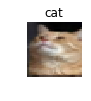

In [27]:
cat = image_train[18:19]
show_images(cat)

### Train a nearest-neighbors model for retrieving images using deep features

Build a nearest neighbors model that will train on `deep_features` and the label is the `id` of each image. Call this model `k_nn`.

In [28]:
# Students write code here.
knn_model = tc.nearest_neighbors.create(image_train, label = 'id', features = ['deep_features'])

Starting brute force nearest neighbors model training.

In [29]:
knn_model.query(cat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 10.178ms     |

| Done         |         | 100         | 62.314ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,384,0.0,1
0,6910,36.9403137951,2
0,39777,38.4634888975,3
0,36870,39.7559623119,4
0,41734,39.7866014148,5


We are going to create a simple function to view the nearest neighbors to save typing:

In [30]:
def get_images_from_ids(query_result):
    return image_train.filter_by(query_result['reference_label'],'id')

In [31]:
cat_neighbors = get_images_from_ids(knn_model.query(cat))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 11.963ms     |

| Done         |         | 100         | 69.021ms     |

+--------------+---------+-------------+--------------+

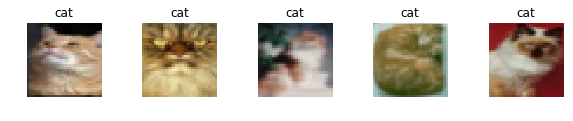

In [32]:
show_images(cat_neighbors)

Very cool results showing similar cats.

### Finding similar images to a car

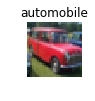

In [34]:
car = image_train[8:9]
show_images(car)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 11.808ms     |

| Done         |         | 100         | 58.32ms      |

+--------------+---------+-------------+--------------+

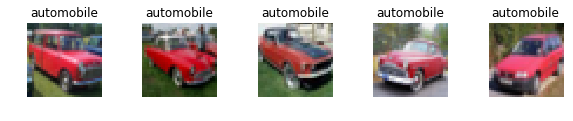

In [35]:
show_images(get_images_from_ids(knn_model.query(car)))

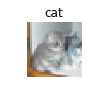

In [36]:
grey_cat = image_train[2:3]
show_images(grey_cat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 11.317ms     |

| Done         |         | 100         | 63.942ms     |

+--------------+---------+-------------+--------------+

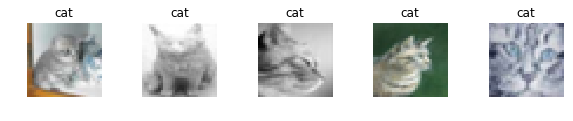

In [37]:
show_images(get_images_from_ids(knn_model.query(grey_cat)))

***Question 2.2:*** Of the images below, which is the nearest ‘cat’ labeled image in the training data to the the first image in the test data (***image_test[0:1]***)?

For this question, train a new `nearest_neighbors` model on only the images labeled 'cat' in the training set.


![cats](https://courses.cs.washington.edu/courses/cse416/18sp/content/cats.png)

In [38]:
# Students write code here
knn_model_cat = tc.nearest_neighbors.create(image_train[image_train['label'] == 'cat'], label = 'id', features = ['deep_features'])

Starting brute force nearest neighbors model training.

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 2.582ms      |

| Done         |         | 100         | 15.636ms     |

+--------------+---------+-------------+--------------+

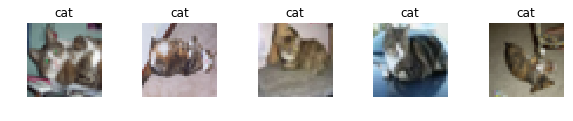

In [40]:
cat_neighbors_2 = get_images_from_ids(knn_model_cat.query(image_test[0:1]))
show_images(cat_neighbors_2)

***Question 2.3:*** Of the images below, which is the nearest ‘dog’ labeled image in the training data to the the first image in the test data (image_test[0:1])?

For this question, train a new `nearest_neighbors` model on only the images labeled 'dog' in the training set.

![cats](https://courses.cs.washington.edu/courses/cse416/18sp/content/dogs.png)

In [41]:
# Students write code here
knn_model_dog = tc.nearest_neighbors.create(image_train[image_train['label'] == 'dog'], label = 'id', features = ['deep_features'])


Starting brute force nearest neighbors model training.

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 2.537ms      |

| Done         |         | 100         | 17.11ms      |

+--------------+---------+-------------+--------------+

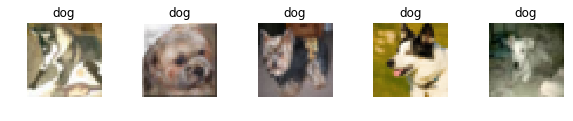

In [42]:
dog_neighbors = get_images_from_ids(knn_model_dog.query(image_test[0:1]))
show_images(dog_neighbors)

***Question 2.4:*** For the first image in the test data, in what range is the mean distance between this image and its 5 nearest neighbors that were labeled ‘cat’ in the training data?

a) 33 - 35  
b) 35 - 37  
c) 37 - 39  
d) 39 - 41  
e) Above 41

In [43]:
# Students write code here
knn_model_cat.query(image_test[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 3.468ms      |

| Done         |         | 100         | 16.242ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16289,34.623719208,1
0,45646,36.0068799284,2
0,32139,36.5200813436,3
0,25713,36.7548502521,4
0,331,36.8731228168,5


In [47]:
knn_model_cat.query(image_test[0:1])['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 3.405ms      |

| Done         |         | 100         | 18.19ms      |

+--------------+---------+-------------+--------------+

36.155730709783

In [46]:
get_images_from_ids(knn_model_cat.query(image_test[0:1]))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 6.454ms      |

| Done         |         | 100         | 21.311ms     |

+--------------+---------+-------------+--------------+

id,image,label,deep_features,image_array
331,Height: 32 Width: 32,cat,"[0.0, 0.0,0.510963916779, 0.0, ...","[45.0, 65.0, 92.0, 72.0,95.0, 110.0, 106.0, ..."
16289,Height: 32 Width: 32,cat,"[0.964287519455, 0.0,0.0, 0.0, 1.12515509129, ...","[215.0, 219.0, 231.0,215.0, 219.0, 232.0, ..."
25713,Height: 32 Width: 32,cat,"[0.536971271038, 0.0,0.0, 0.0894458889961, ...","[228.0, 222.0, 236.0,224.0, 213.0, 222.0, ..."
32139,Height: 32 Width: 32,cat,"[1.29409468174, 0.0, 0.0,0.513800263405, ...","[217.0, 220.0, 205.0,221.0, 227.0, 218.0, ..."
45646,Height: 32 Width: 32,cat,"[0.983677506447, 0.0,0.0, 0.0, 0.0, ...","[51.0, 42.0, 26.0, 56.0,47.0, 31.0, 59.0, 50.0, ..."


***Question 2.5:*** For the first image in the test data, in what range is the mean distance between this image and its 5 nearest neighbors that were labeled ‘dog’ in the training data?

a) 33 - 35  
b) 35 - 37  
c) 37 - 39
d) 39 - 41  
e) Above 41

In [48]:
# Students write code here
knn_model_dog.query(image_test[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 3.348ms      |

| Done         |         | 100         | 17.825ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16976,37.4642628784,1
0,13387,37.5666832169,2
0,35867,37.6047267079,3
0,44603,37.7065585153,4
0,6094,38.5113254907,5


***Question 2.6:*** On average, is the first image in the test data closer to its 5 nearest neighbors in the ‘cat’ data or in the ‘dog’ data?

a) cat  
b) dog  